In [1]:
import sys
sys.path.append("..")

from MSOModelModule.fancyPlot import * 
import numpy as np
from matplotlib import pyplot as plt
from MSOModelModule.core import MSOModel
import matplotlib.gridspec as gridspec
from matplotlib import ticker

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Chapter 3 - Methods

This notebook contains the code that was used to generate the figures as shown in chapter 3

## Figure 3.2

Vector strength for various frequencies 

Generating spike trains phase-lock plots...
	Allocating data...
Initialisation succeeded
	Allocating data...
Initialisation succeeded
	Allocating data...
Initialisation succeeded
Generating spike trains vector strength plots...
	Allocating data...
Initialisation succeeded
	Allocating data...
Initialisation succeeded
	Allocating data...
Initialisation succeeded
	Allocating data...
Initialisation succeeded
	Allocating data...
Initialisation succeeded
	Allocating data...
Initialisation succeeded
	Allocating data...
Initialisation succeeded
	Allocating data...
Initialisation succeeded
	Allocating data...
Initialisation succeeded
	Allocating data...
Initialisation succeeded
	Allocating data...
Initialisation succeeded
	Allocating data...
Initialisation succeeded


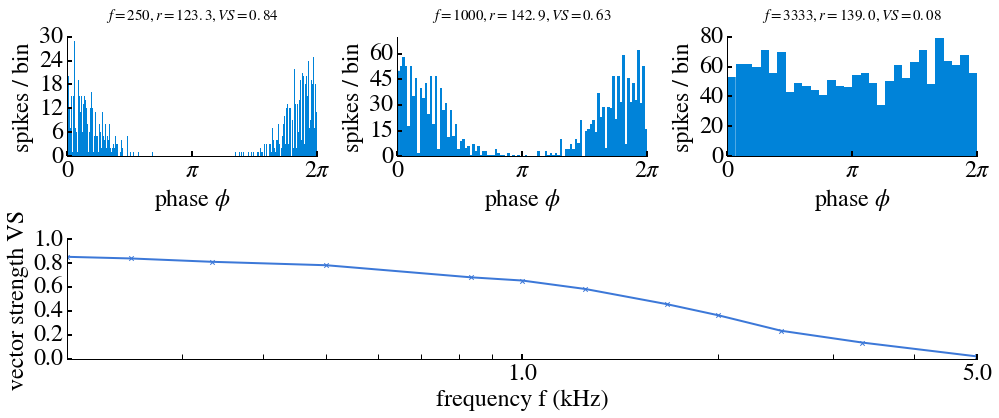

In [2]:
colors = basiccolors()

def vectorStrength(spikes, T, dt):
    ts = np.where(spikes == 1.0)[0]
    phases = [(t*dt % T)/T*2*np.pi for t in ts]
    vectorStrength = (1.0 / len(ts))*np.sqrt(np.sum([np.cos(phase) for phase in phases])**2 + np.sum([np.sin(phase) for phase in phases])**2)
    return vectorStrength, vectorStrength*0.5*np.sqrt(2) / len(ts)

# Generate firings for three frequencies and set them in plot 
Ts = [4.0, 1.0, 0.3]

fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])
ax4 = plt.subplot(gs[1, :])
color = colors[0]
ax = [ax1, ax2, ax3, ax4]

print "Generating spike trains phase-lock plots..."
for i, T in enumerate(Ts):

    sim = MSOModel(
        timesteps=12000,batchsize=12000,
        vt=4.0,input_neurons=2,
        MSO_neurons=1,dt=0.01,
        T=T,storeData=False,
        path='testplots_delays'
    )

    # Compute vector strength and frequency
    batch_firings = sim.generateFirings()
    vs, x = vectorStrength(batch_firings[0], sim.T, sim.dt)
    fr = np.sum(batch_firings[0]) / sim.batchsize * 1000
    f = 1.0/sim.T*1000

    # Plot results 
    ax[i].hist(np.where(batch_firings[0] == 1.0)[0]*sim.dt % sim.T, int(round(sim.T/sim.dt)),
        range=[0, sim.T], edgecolor='none', color=color)
    ax[i].set_title(r'$f = {:.0f}, r = {:.1f}, VS = {:.2f}$'.format(f, fr, vs), y=1.1, fontsize=15)
    ax[i].set_xlabel(r'phase $\phi$')
    ax[i].set_ylabel('spikes / bin')
    x_tick = np.linspace(0, sim.T, 3)
    x_label = [r"$0$", r"$\pi$", r"$2\pi$"]
    ax[i].set_xticks(x_tick)
    ax[i].set_xticklabels(x_label)
    max_yticks = 5
    yloc = plt.MaxNLocator(max_yticks)
    ax[i].yaxis.set_major_locator(yloc)

print "Generating spike trains vector strength plots..."
# Generate firings for various frequencies to compute and plot their vector strength
Ts = [5.0, 4.0, 3.0, 2.0, 1.2, 1.0, 0.8, 0.6, 0.5, 0.4, 0.3, 0.2]
dt = 0.01
vs = np.zeros(len(Ts))
fr = np.zeros(len(Ts))
f = np.zeros(len(Ts))
std = np.zeros(len(Ts))

for i, T in enumerate(Ts):

    sim = MSOModel(
        timesteps=12000,
        batchsize=12000,
        vt=4.0,
        input_neurons=2,
        MSO_neurons=1,
        dt=dt,
        T=T,
        storeData=False,
        path='testplots_delays'
    )

    batch_firings = sim.generateFirings()

    vs[i], std[i] = vectorStrength(batch_firings[0], sim.T, sim.dt)
    fr[i] = np.sum(batch_firings[0]) / sim.batchsize * 1000
    f[i] = 1.0/sim.T

color = '#3c78d8'

ax[3].scatter(f, vs, marker='x', color=color)
ax[3].plot(f, vs, lw=2.0, color=color)
ax[3].set_xscale('log')
ax[3].set_xticks([0.1, 1, 5])
ax[3].get_xaxis().set_major_formatter(ticker.ScalarFormatter())
ax[3].set_ylim([0, 1.0])
ax[3].set_xlim([0.2, 5.0])
ax[3].set_xlabel('frequency f (kHz)')
ax[3].set_ylabel('vector strength VS')

cleanAxes(ax)

plt.tight_layout()
plt.savefig('figures/chapter3/vectorstrength.pdf')
plt.show()


## Figure 3.3C

Example of a sequence of ITDs for sound locating task

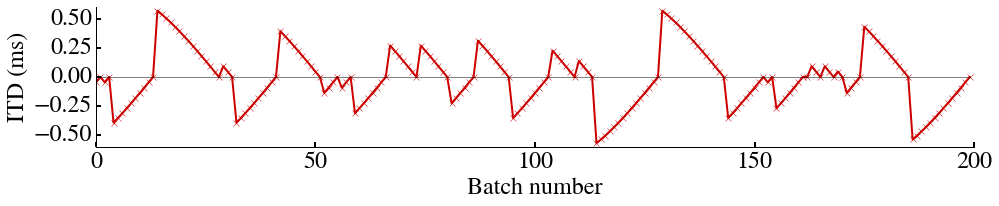

In [3]:
nr_batches = 200
step_degree = 5.0

c = 343.0
h = 0.09

def ITD(angle):
    angle = np.radians(angle)
    return (h*1000.0/c)*(np.sin(angle) + angle)

thetas = np.zeros(nr_batches)
theta_options = np.arange(-45, 45 + step_degree, step_degree)
theta_head = np.random.choice(theta_options)
theta_sound = np.random.choice(theta_options)
thetas[0] = theta_head - theta_sound

for i in range(1, nr_batches):
    theta_head += -np.sign(thetas[i - 1])*step_degree
    if thetas[i - 1] == 0:
        theta_sound = np.random.choice(theta_options)
    thetas[i] = theta_head - theta_sound

itds = ITD(thetas)

color = '#cc0000'

fig, ax = plt.subplots(1, figsize=(14, 3))
ax.plot(range(len(itds)), itds, '-', alpha=1.0, c=color, lw=2.0)
ax.plot(range(len(itds)), itds, 'x', c=color, lw=2.0)
ax.plot(range(len(itds)), [0.0]*len(itds), ls='-', alpha=0.5, lw=1.0, c='black')
ax.set_xlabel(r'Batch number')
ax.set_ylabel('ITD (ms)')
ax.set_yticks([-0.5, -0.25, 0.0, 0.25, 0.5])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.tick_params('both', length=5, width=2, which='major')
ax.tick_params('both', length=5, width=1, which='minor')

plt.tight_layout()
fig.savefig('figures/chapter3/itdpath.pdf')
plt.show()


# Figure 3.4

STDP window and online implementation of STDP

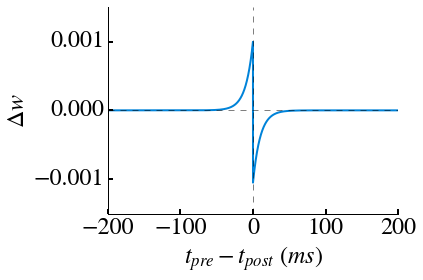

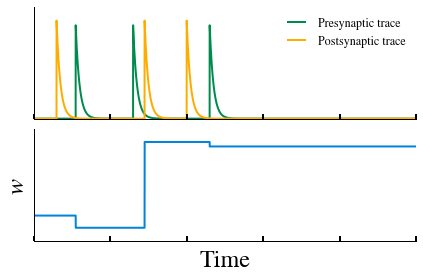

In [4]:
def rungeKutta(f, x, args, dt):

    k_1 = f(x, *args)
    k_2 = f(x + 0.5*dt*k_1, *args)
    k_3 = f(x + 0.5*dt*k_2, *args)
    k_4 = f(x + dt*k_3, *args)

    return x + (1.0/6)*dt*(k_1 + 2*k_2 + 2*k_3 + k_4)

def euler(f, x, args, dt):

        return x + dt*f(x, *args)

# STDP parameters
dt = 0.1
taup = 10.0
taun = 10.0
Ap = 0.00100
An = 0.00105
gmax = 3.0

# STDP funnctions
F = lambda t: Ap*np.exp(t/taup)*(t < 0.0) - An*np.exp(-t/taun)*(t >= 0.0)
dpre = lambda x: -x/taup
dpost = lambda x: -x/taun

# Two informative set of spikes
preSpikes = np.array([200, 350, 550]) - 90
postSpikes = np.array([150, 380, 490]) - 90
tlim = (0, 1000)

t_range = np.arange(tlim[0], tlim[1], dt)
g = np.ones(len(t_range))*0.000000001
gn = np.zeros(len(t_range))

preTrace = np.zeros(len(t_range))
postTrace = np.zeros(len(t_range))

for i, t in enumerate(t_range):
    if i != 0:
        preTrace[i] = euler(dpre, preTrace[i - 1], [], dt)
        postTrace[i] = euler(dpre, postTrace[i - 1], [], dt)
    if t in preSpikes:
        preTrace[i] += Ap
        gn[i:] = gn[i] - postTrace[i]
    if t in postSpikes:
        postTrace[i] += An
        gn[i:] = gn[i] + preTrace[i]

# Run pre-post scheme
dg = []
for tpre in preSpikes:
    for tpost in postSpikes:
        dt = (tpre - tpost)
        spike_t = max(tpre, tpost)
        dg.append((spike_t, F(dt)))

sorteddg = sorted(dg)
for t, delta in sorteddg:
    idx = np.where(t_range == t)[0][0]
    g[idx:] = g[idx] + delta

color_blue = colors[1]
color_red = colors[0]
color_orange = colors[2]

# Plot time window
fig, ax = plt.subplots(1, 1)
ax.set_ylim([-0.0015, 0.0015])
ax.plot(np.arange(-200, 200, 0.05), [F(t) for t in np.arange(-200, 200, 0.05)], lw=2.0, color=color_red)
ax.plot([-200, 200], [0, 0], ls='--', color='black', alpha=0.5)
ax.axvline(0, ls='--', color='black', alpha=0.5)
ax.set_xlabel(r'$t_{pre} - t_{post}$ $(ms)$')
ax.set_ylabel(r'$\Delta w$')
plt.tight_layout()
ax.locator_params(axis='y', nbins=5)
ax.locator_params(axis='x', nbins=5)
cleanAxes([ax])
plt.tight_layout()
plt.savefig('figures/chapter3/stdpwindowfunction.pdf')

# Plot STDP progression
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t_range, preTrace, color=color_blue, lw=2.0)
ax[0].plot(t_range, postTrace, color=color_orange, lw=2.0)
ax[0].set_xlim(tlim)
ax[0].legend(['Presynaptic trace', 'Postsynaptic trace'], frameon=False)
ax[0].set_ylim([0, 0.0012])

ax[0].set_yticks([])
ax[1].set_ylim([-0.000015, 0.00005])
ax[1].set_yticks([])
ax[1].plot(t_range, g, lw=2.0, c=color_red)
ax[1].set_xlabel('Time')
ax[1].set_ylabel(r'$w$', fontsize=24)
ax[1].set_xticklabels([])

cleanAxes(ax)
plt.tight_layout()
plt.savefig('figures/chapter3/stdplearning.pdf')
plt.show()
